In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ultimate_combined.csv")
df = df.apply(lambda col: col.sort_values().reset_index(drop=True))


In [3]:
df

,Participant,Stimulus_Name,Valence,Arousal,ibi mean normalize,ibi min normalize,ibi max normalize,ibi skew normalize,ibi kurtosis normalize,ibi std normalize
0,GRP01,A1_LP,-0.879700,-0.613159,-0.622233,-0.667431,-0.592629,-2.779368,-1.745600,0.000000
1,GRP01,A1_LP,-0.836817,-0.546479,-0.620995,-0.658442,-0.572757,-2.758367,-1.677436,0.000000
2,GRP01,A1_LP,-0.831306,-0.535460,-0.600623,-0.654341,-0.533014,-2.611546,-1.673034,0.000000
3,GRP01,A1_LP,-0.770899,-0.529998,-0.596952,-0.642308,-0.533014,-2.574309,-1.668620,0.000000
4,GRP01,A1_LP,-0.760351,-0.508861,-0.576349,-0.642308,-0.513142,-2.453715,-1.633581,0.000000
...,...,...,...,...,...,...,...,...,...,...
815,group_33_v1_9,W_HN,0.536135,0.586412,0.441228,0.024961,0.987406,2.265989,7.389804,0.318587
816,group_33_v1_9,W_HN,0.538077,0.615042,0.451058,0.026954,1.039707,2.294520,8.403131,0.346850
817,group_33_v1_9,W_HN,0.539689,0.640659,0.490563,0.030579,1.103524,2.318665,8.863024,0.378925
818,group_33_v1_9,W_HN,0.560961,0.647299,0.536451,0.098304,1.379658,2.356993,9.129916,0.413833


# Heart Rate Arousal Correlations

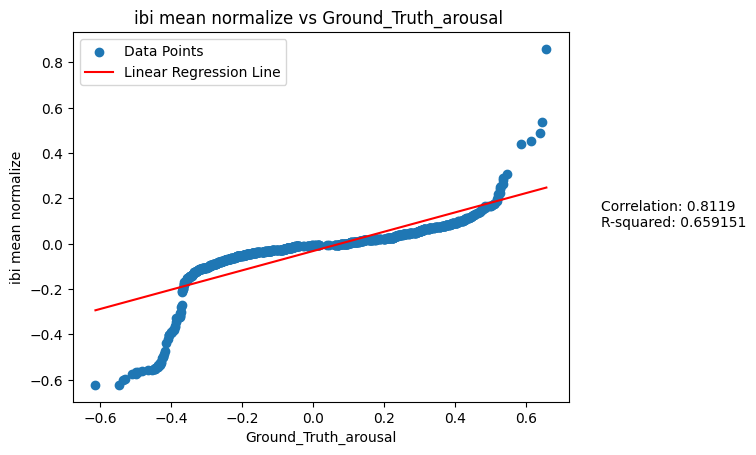

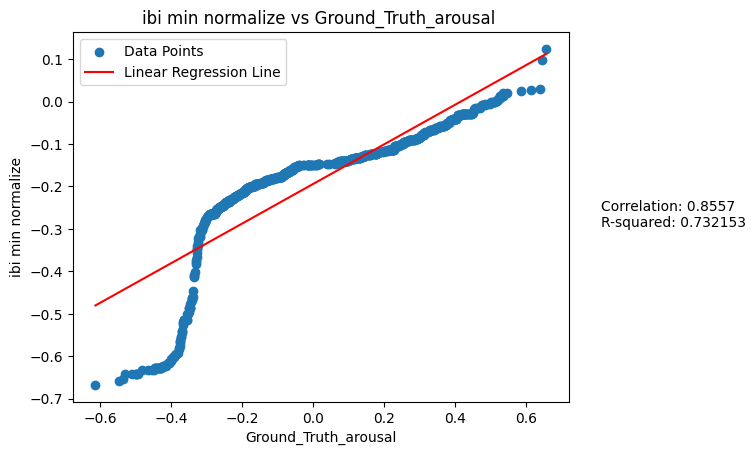

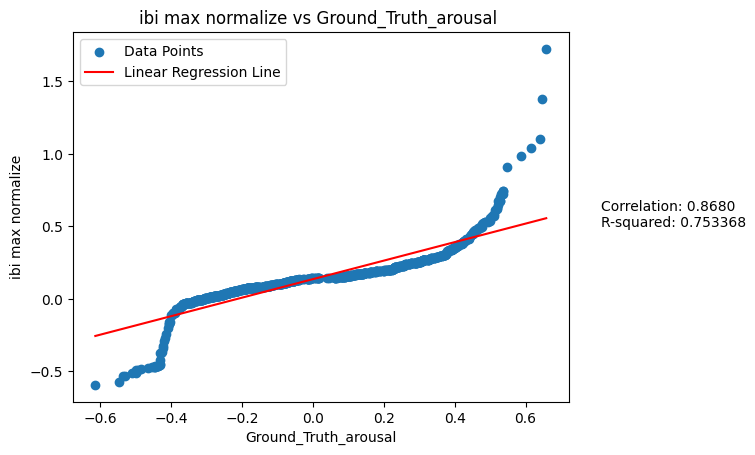

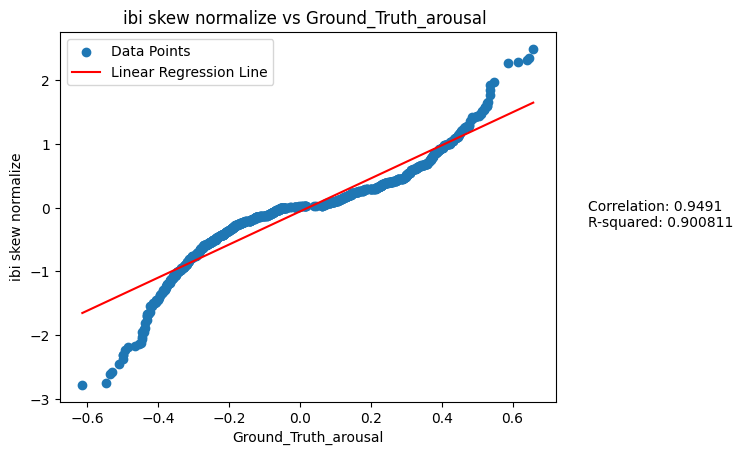

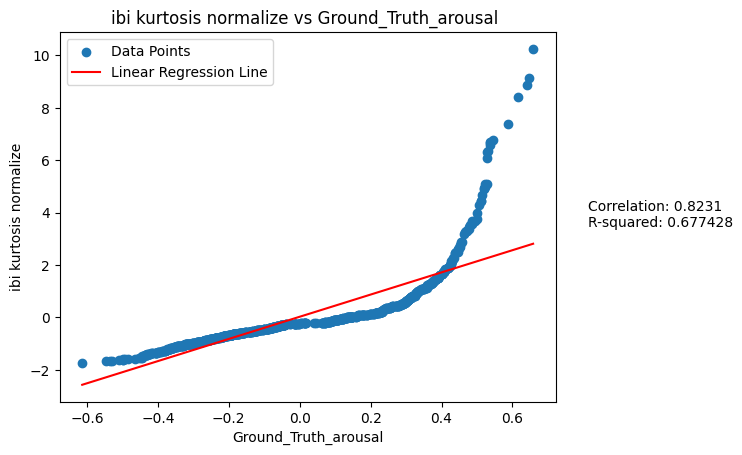

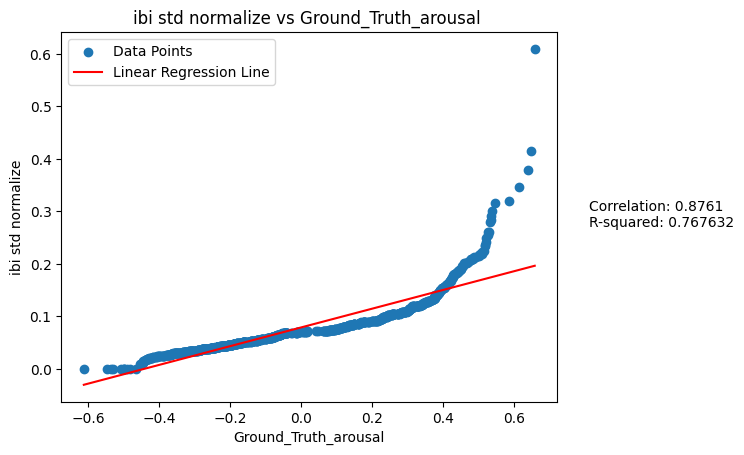

In [5]:

features = df.iloc[:, 4:]
correlation_r2_values = []

for feature_name, feature_values in features.items():
  X = pd.to_numeric(df['Arousal'])
  y = pd.to_numeric(feature_values)
  correlation_coefficient = X.corr(y)
  r_squared = correlation_coefficient**2

  regression_coefficients = np.polyfit(X, y, 1)
  regression_line = np.poly1d(regression_coefficients)

  plt.scatter(X, y, label='Data Points')
  plt.plot(X, regression_line(X), color='red', label='Linear Regression Line')

  plt.xlabel('Ground_Truth_arousal')
  plt.ylabel(feature_name)
  plt.title(f'{feature_name} vs Ground_Truth_arousal ')
  plt.legend()
  correlation_text = f'Correlation: {correlation_coefficient:.4f}\nR-squared: {r_squared:.6f}'

  plt.text(0.95, 0.5, correlation_text, ha='left', va='center', color='black', fontsize=10, transform=plt.gcf().transFigure)
  correlation_r2_values.append({'Feature': f'{feature_name} vs Ground_Truth_Arousal', 'Correlation': correlation_coefficient, 'R-squared': r_squared})


  plt.show()


In [ ]:
df = pd.read_csv("testing_merge_data.csv")